In [1]:
import pandas as pd
from matplotlib.pylab import plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_pickle('cleaned_data.p')

In [3]:
dont_eda = ['yearbuilt', 'transactiondate', 'parcelid', 'assessmentyear', 'logerror']

continuous = filter(lambda v: '_' not in v and v not in dont_eda, df.columns)
df_cont = df[continuous]
print df_cont.dtypes

numberofstories         float64
poolcnt                 float64
reserves                float64
roomcnt                 float64
bedroomcnt              float64
taxamount               float64
schiller                float64
bathroomcnt             float64
garagecarcnt            float64
fullbathcnt             float64
finishedsquarefeet12    float64
lotsizesquarefeet       float64
dtype: object


In [4]:
from scipy.stats import skew
print zip(df_cont.columns, map(lambda v: round(v, 2), skew(df_cont)))

[('numberofstories', 1.48), ('poolcnt', 1.52), ('reserves', -1.84), ('roomcnt', 1.55), ('bedroomcnt', 0.76), ('taxamount', 10.38), ('schiller', 1.13), ('bathroomcnt', 1.29), ('garagecarcnt', 6.15), ('fullbathcnt', 1.28), ('finishedsquarefeet12', 2.88), ('lotsizesquarefeet', 28.1)]


In [5]:
def logcols(df, cols):
    df[cols] = df[cols].applymap(lambda v: np.log(v+1))
    return df

In [6]:
df_logged = df_cont.pipe(logcols, cols=['taxamount', 'garagecarcnt', 'finishedsquarefeet12', 'lotsizesquarefeet'])

c:\Users\weixi51\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\core\frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [7]:
from sklearn.preprocessing import normalize
df_norm = normalize(df_logged)

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
from matplotlib.pylab import plt
%matplotlib inline

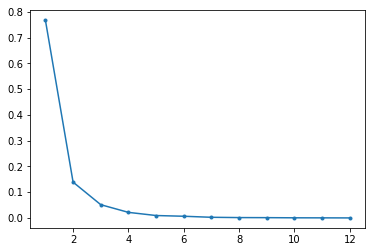

[  7.67101509e-01   1.38872453e-01   5.13217075e-02   2.15320342e-02
   9.27640561e-03   6.45256290e-03   2.43829070e-03   1.29154277e-03
   1.02657279e-03   4.37973935e-04   2.48933971e-04   1.30212025e-08]


In [10]:
explained = pca.explained_variance_ratio_ 
plt.plot(range(1, len(explained) + 1), explained, marker='.')
plt.show()
print explained

In [11]:
components = pd.DataFrame(pca.components_, columns=df_logged.columns)

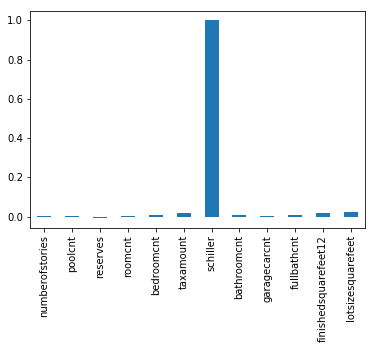

In [12]:
components.iloc[0].plot(kind='bar')

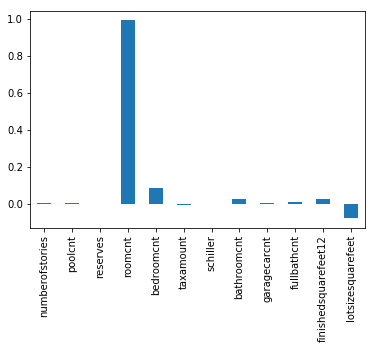

In [13]:
components.iloc[1].plot(kind='bar')

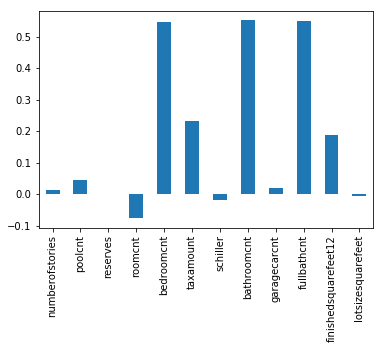

In [14]:
components.iloc[2].plot(kind='bar')